In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
import scipy.stats as stats
import seaborn as sns

In [191]:
mu_1  = 1.2
std_1 = 1.0

mu_2  = 1.0
std_2 = 1.0

def gen_t_n_p(i,n):
    rng   = np.random.default_rng(seed=i)

    data_1 = rng.normal(mu_1, 1.0, n)
    data_2 = rng.normal(mu_2, 1.0, n)
    t, p = stats.ttest_ind(data_1, data_2, equal_var=True)
    t_at_05 = stats.t.ppf(1-0.05, n-1)
    
    return t, t_at_05

In [192]:
gen_t_n_p(1,100)

(1.5228375035569088, 1.6603911559963895)

In [193]:
reps  = 100
start = 10
end   = 200

size = reps * (end - start)

t_values = np.zeros(size)
t_avgs   = np.zeros(size)
p_values = np.zeros(size)
p_avgs   = np.zeros(size)

for outer_idx, n in enumerate(range(start, end, 1)):
    rep_t_values = np.zeros(reps)
    rep_t_avgs   = np.zeros(reps)
    rep_p_values = np.zeros(reps)
    rep_p_avgs   = np.zeros(reps)

    for i in range(reps):
        t, p = gen_t_n_p(i,n)
        rep_t_values[i] = t
        rep_p_values[i] = p

    t_avg = np.average(rep_t_values)
    p_avg = p

    offset = (outer_idx * reps)
#     print(f"outer_idx: {outer_idx}, offset = {offset}")
    
    for i in range(reps):
        n_index = offset + i
        t_values[n_index] = rep_t_values[i]
#         print(f"n_index: {n_index}, rep_t_value: {rep_t_values[i]}")
        t_avgs[n_index]   = t_avg
        p_values[n_index] = rep_p_values[i]
        p_avgs[n_index]   = p_avg


In [218]:
len(t_values)

19000

[    0.  2500.  5000.  7500. 10000. 12500. 15000. 17500. 20000.]
19000


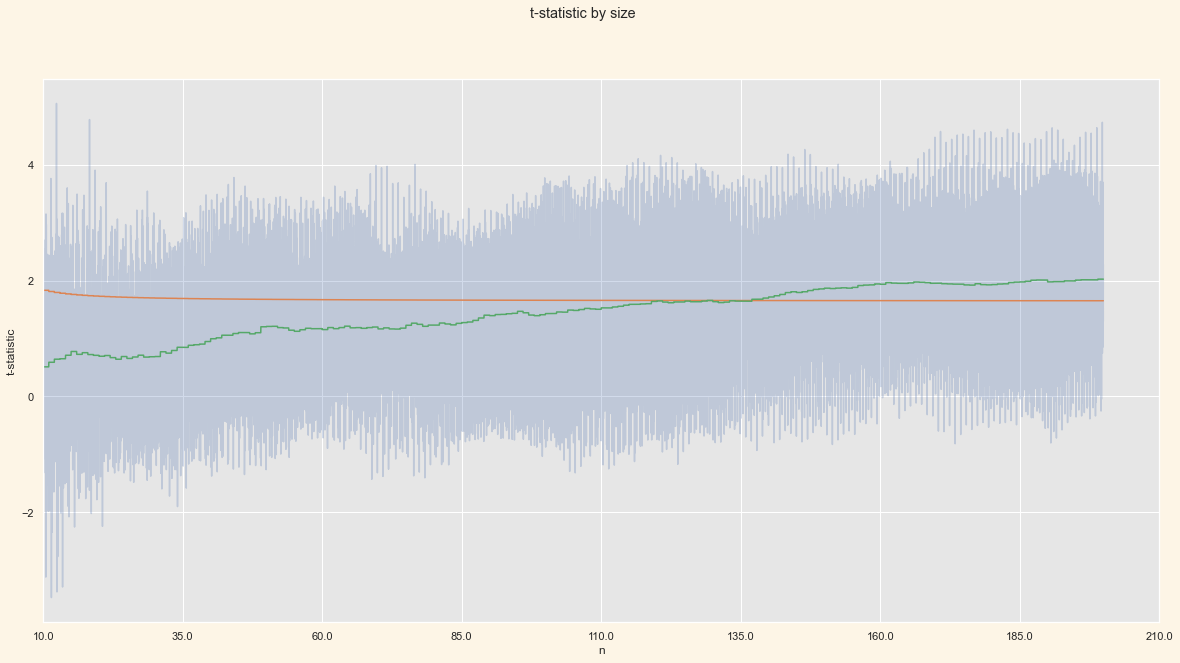

In [257]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('t-statistic by size')

# sns.color_palette("flare", as_cmap=True)
# sns.color_palette("OrRd")
sns.set(rc={'axes.facecolor':'0.9', 'figure.facecolor':'oldlace'})

total_range = np.arange(len(t_values))
axs = sns.lineplot(x=total_range, y=t_values, alpha=0.25)
# sns.lineplot(ax=axs, x=total_range, y=p_avgs, alpha=1, color='k', marker="v", s=20)
# sns.lineplot(ax=axs, x=total_range, y=t_avgs, alpha=1, color='r', marker="D", s=20)
sns.lineplot(ax=axs, x=total_range, y=p_avgs, alpha=1)
sns.lineplot(ax=axs, x=total_range, y=t_avgs, alpha=1)
axs.set_ylabel('t-statistic')
plt.xlabel('n')
plt.xlim(start, size)
locs, labels = plt.xticks()
plt.xticks(locs, (locs/100)+start)
print(locs)
print(len(total_range))